<a href="https://colab.research.google.com/github/gongx030/seatac_manuscript/blob/main/SeATAC_OSK_MEFs_D7_specific_genes_sf6g.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compare MACS2 and SeATAC for detecting differential V-plots of ATAC-seq data between MEFs and MEFs at day7 post OSK induction 

This task runs on SeATAC `v0.4.0`

In [1]:
start_time <- Sys.time()

### Install external packages

In [2]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [3]:
system('apt-get install libcairo2-dev', intern = TRUE) # for Cairo package that is required by ComplexHeatmap package

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

### Install R packages from CRAN

In [4]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
required_packages <- c(
  "GenomicAlignments",
  'BSgenome.Mmusculus.UCSC.mm10',
  'motifmatchr',
  'uwot',
  'igraph',
  'VennDiagram',
  'patchwork',
  'TxDb.Mmusculus.UCSC.mm10.knownGene',
  'org.Mm.eg.db',
  'clusterProfiler'
 )

In [6]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Installing package(s) 'BiocVersion', 'GenomicAlignments',
  'BSgenome.Mmusculus.UCSC.mm10', 'motifmatchr', 'uwot', 'igraph',
  'VennDiagram', 'patchwork', 'TxDb.Mmusculus.UCSC.mm10.knownGene',
  'org.Mm.eg.db', 'clusterProfiler'

also installing the dependencies ‘rjson’, ‘pracma’, ‘xtable’, ‘R.oo’, ‘R.methodsS3’, ‘filelock’, ‘gridGraphics’, ‘tweenr’, ‘polyclip’, ‘lazyeval’, ‘restfulr’, ‘poweRlaw’, ‘annotate’, ‘R.utils’, ‘plogr’, ‘formatR’, ‘BiocFileCache’, ‘png’, ‘gridExtra’, ‘fastmatch’, ‘ggfun’, ‘ggplotify’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘ape’, ‘tidytree’, ‘treeio’, ‘RCurl’, ‘GenomeInfoDbData’, ‘XVector’, ‘MatrixGenerics’, ‘Biobase’, ‘DelayedArray’, ‘zlibbioc’, ‘bitops’, ‘Rhtslib’, ‘snow’, ‘BH’, ‘rtracklayer’, ‘matrixStats’

In [7]:
library(devtools)

Loading required package: usethis



### Install R packages from github

In [8]:
install_github("GreenleafLab/chromVARmotifs")

vctrs        (0.4.0 -> 0.4.1) [CRAN]
blob         (1.2.2 -> 1.2.3) [CRAN]
RColorBrewer (1.1-2 -> 1.1-3) [CRAN]
scales       (1.1.1 -> 1.2.0) [CRAN]


Installing 4 packages: vctrs, blob, RColorBrewer, scales

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpxMHvY5/remotes62288b02ce/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’ ... OK
* preparing ‘chromVARmotifs’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘chromVARmotifs_0.2.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
devtools::install_github("GuangchuangYu/ChIPseeker")

enrichplot   (1.14.2 -> d11b60bb6...) [GitHub]
TxDb.Hsap... (NA     -> 3.2.2       ) [CRAN]
plotrix      (NA     -> 3.8-2       ) [CRAN]
gplots       (NA     -> 3.1.1       ) [CRAN]


Installing 3 packages: TxDb.Hsapiens.UCSC.hg19.knownGene, plotrix, gplots

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





* checking for file ‘/tmp/RtmpxMHvY5/remotes621235e9e7/GuangchuangYu-enrichplot-d11b60b/DESCRIPTION’ ... OK
* preparing ‘enrichplot’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘enrichplot_1.13.1.992.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpxMHvY5/remotes627cc016b9/YuLab-SMU-ChIPseeker-5945269/DESCRIPTION’ ... OK
* preparing ‘ChIPseeker’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘ChIPseeker_1.31.4.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Install `seatac` from github

In [10]:
install_github('gongx030/seatac', quiet = FALSE, ref = 'v0.4.0') # install from the branch v0.4.0
devtools::reload(pkgload::inst("seatac"))
library(seatac)

tfautograph  (NA -> 0.3.2 ) [CRAN]
config       (NA -> 0.3.1 ) [CRAN]
here         (NA -> 1.0.1 ) [CRAN]
RcppTOML     (NA -> 0.1.7 ) [CRAN]
zeallot      (NA -> 0.1.0 ) [CRAN]
tfruns       (NA -> 1.5.0 ) [CRAN]
tensorflow   (NA -> 2.8.0 ) [CRAN]
reticulate   (NA -> 1.24  ) [CRAN]
keras        (NA -> 2.8.0 ) [CRAN]
abind        (NA -> 1.4-5 ) [CRAN]
tfdatasets   (NA -> 2.7.0 ) [CRAN]
tfprobabi... (NA -> 0.15.0) [CRAN]


Installing 12 packages: tfautograph, config, here, RcppTOML, zeallot, tfruns, tensorflow, reticulate, keras, abind, tfdatasets, tfprobability

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpxMHvY5/remotes622bad8826/gongx030-seatac-55f9f36/DESCRIPTION’ ... OK
* preparing ‘seatac’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘seatac_0.4.0-010.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tensorflow

Loading required package: tfprobability

Loading required package: tfdatasets

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘pa

### Load R packages

In [11]:
library(BSgenome.Mmusculus.UCSC.mm10)
library(dplyr)
library(motifmatchr)
library(chromVARmotifs)
library(igraph)
library(VennDiagram)
library(ggplot2)
library(patchwork)
library(ChIPseeker)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(org.Mm.eg.db)
library(clusterProfiler)

Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Loading required package: rtracklayer


Attaching package: ‘dplyr’


The following objects are masked from ‘package:Biostrings’:

    collapse, intersect, setdiff, setequal, union


The following object is masked from ‘package:XVector’:

    slice


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, u

### TensorFlow setup

In [12]:
gpus <- tf$config$list_physical_devices('GPU')
for (gpu in gpus){
  tf$config$experimental$set_memory_growth(gpu, TRUE)
}
logical_gpus <- tf$config$experimental$list_logical_devices('GPU')
sprintf('Physical GPUs: %d', length(gpus)) %>% message()
sprintf('Logical GPUs: %d', length(logical_gpus)) %>% message()

Loaded Tensorflow version 2.8.0

Physical GPUs: 1

Logical GPUs: 1



In [13]:
Sys.time() - start_time

Time difference of 36.21423 mins

## Parameters

In [90]:
ARGS <- list(
  bin_size = 5L,
  fragment_size_range_max = 640L,
  fragment_size_interval = 20L,
  window_size = 1000L,
  block_size = 640L,
  sliding_step = 20L,
  min_reads = 10L,
  vae_num_peaks = 5000L,
  vae_latent = c(5L),
  vae_filters0 = c(128L),
  vae_filters = c(32L),
  vae_downsample_layers = 4L,
  vae_upsample_layers = 4L,
  vae_base_learning_rate = c(1e-2),
  vae_epochs = 200L,
  vae_beta_schedule_method = c('constant'),
  vae_beta0 = 1,
  vae_batch_size = c(128L),
  vae_warmup_ratio = 0.1,
  padjusted_cutoff = 0.05,
  log_ratio_cutoff = 0.1,
  step_size = 200L,
  upstream = -5000,
  downstream = 1000,
  pvalueCutoff = 1,
  qvalueCutoff = 1,
  center_width = 100L # the center width
)

#MEF

## OSK motif regions with differential vplots

In [15]:
tab <- read.table('https://s3.msi.umn.edu/gongx030/projects/seatac_project/config/seatac_OSKM/results.tsv', sep = '\t', header = TRUE)

In [16]:
res <- read.table(tab[tab$vae_latent == 5,]$remote_output_file, header = FALSE, sep = '\t')

In [17]:
colnames(res) <- c('seqnames','start','end','width','strand','pvalue_z','padj','nucleosome_treatment','nucleosome_control','log_ratio')

In [18]:
res <- GRanges(res)

In [19]:
sprintf('number of motif-centric regions: %s', length(res)) %>% message()

number of motif-centric regions: 282789



In [20]:
is_signif <- res$padj < 0.05
sprintf('# of significantly differential V-plots called by SeATAC: %d', sum(is_signif)) %>% message()

# of significantly differential V-plots called by SeATAC: 19603



In [21]:
gr_oct4 <- matchMotifs(homer_pwms["Oct4(POU,Homeobox)/mES-Oct4-ChIP-Seq(GSE11431)/Homer"], res, genome = BSgenome.Mmusculus.UCSC.mm10, out = 'positions')[[1]] %>%
  resize(width = ARGS[['block_size']], fix = 'center')

## Load data

In [22]:
remote_bam_files <- c(
  MEF = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/MEF.dedup.bam',
  MEF_OSK_D7 = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/OSK_D7.dedup.bam'
)
for (i in 1:length(remote_bam_files)){
  sprintf('wget -cx %s', remote_bam_files[i]) %>% system()
}
local_bam_files <- gsub('https://', './', remote_bam_files)

## Load bed files

In [23]:
remote_bed_files <- gsub('.bam', '_summits.bed', remote_bam_files)
for (i in 1:length(remote_bed_files)){
  sprintf('wget -cx %s', remote_bed_files[i]) %>% system()
}
local_bed_files <- gsub('https://', './', remote_bed_files)
all(file.exists(local_bed_files))

[1] TRUE

## Training VAE

In [91]:
models <- list()

In [92]:
cond <- c('MEF', 'MEF_OSK_D7')

In [93]:
gr0 <- lapply(local_bed_files[cond], function(bed_file){
  peaks <- read.table(bed_file, header = FALSE, sep = '\t')
  peaks <- GRanges(seqnames = peaks[, 1], range = IRanges(start = peaks[, 2], end = peaks[, 3]))
  peaks <- resize(peaks, fix = 'center', width = ARGS[['step_size']])
  peaks
}) %>%
  GRangesList() %>%
  coverage() %>%
  IRanges::slice(lower = 1, rangesOnly = TRUE) %>%
  GRanges() %>%
  resize(fix = 'center', width = ARGS[['window_size']])
gr0 <- gr0[!seqnames(gr0) %in% c('chrM', 'chrY')]

In [94]:
gr <- slidingWindows(gr0, width = ARGS[['block_size']], step = ARGS[['sliding_step']]) %>% unlist()
set.seed(1L); gr <- sample(gr, ARGS[['vae_num_peaks']])
counts <- count_reads(gr, local_bam_files[cond], genome = BSgenome.Mmusculus.UCSC.mm10,  fragment_size_range = c(0, ARGS[['fragment_size_range_max']]))

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/MEF.dedup.bam

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/OSK_D7.dedup.bam



In [95]:
valid <- rowSums(counts >= ARGS[['min_reads']]) == length(cond)
gr <- gr[valid]
sprintf('number of training peaks for VaeModel: %d', length(gr)) %>% message()

number of training peaks for VaeModel: 2950



In [96]:
x <- read_vplot(
  gr, 
  filenames = local_bam_files[cond], 
  genome = BSgenome.Mmusculus.UCSC.mm10, 
  bin_size = ARGS[['bin_size']], 
  fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), 
  fragment_size_interval = ARGS[['fragment_size_interval']]
)

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/MEF.dedup.bam

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/OSK_D7.dedup.bam



In [97]:
model <- new('VaeModel', model = VaeModel(
  n_samples = dim(x)['sample'],
  latent_dim = ARGS[['vae_latent']],
  block_size = ARGS[['block_size']],
  bin_size = ARGS[['bin_size']],
  filters0 = ARGS[['vae_filters0']],
  filters = ARGS[['vae_filters']],
  upsample_layers = ARGS[['vae_upsample_layers']],
  downsample_layers = ARGS[['vae_downsample_layers']],
  fragment_size_range  = c(0, ARGS[['fragment_size_range_max']]),
  fragment_size_interval = ARGS[['fragment_size_interval']]
))
lr <- WarmUpAndCosineDecay(
  base_learning_rate = ARGS[['vae_base_learning_rate']],
  num_examples = nrow(x),
  batch_size = ARGS[['vae_batch_size']],
  epochs = ARGS[['vae_epochs']],
  warmup_epochs = as.integer(ARGS[['vae_epochs']] * ARGS[['vae_warmup_ratio']])
)
beta <- beta_schedule(
  method = ARGS[['vae_beta_schedule_method']],
  beta0 = ARGS[['vae_beta0']],
  epochs = ARGS[['vae_epochs']]
)
d <- model %>% prepare_data(x)
d <- d %>% tensor_slices_dataset()
models[['MEF']] <- model %>% fit(d, batch_size =  ARGS[['vae_batch_size']], epochs = ARGS[['vae_epochs']], learning_rate = lr, compile = TRUE, beta = beta)

epoch=     1/   200 | beta=1.000e+00 | loss= 3470.1653035 | loss_reconstruction= 3469.6343180 | loss_kl=    0.5310036

epoch=     2/   200 | beta=1.000e+00 | loss= 2878.4208069 | loss_reconstruction= 2877.7587280 | loss_kl=    0.6620703

epoch=     3/   200 | beta=1.000e+00 | loss= 2544.8036906 | loss_reconstruction= 2543.0950623 | loss_kl=    1.7086063

epoch=     4/   200 | beta=1.000e+00 | loss= 2242.8116964 | loss_reconstruction= 2241.5089518 | loss_kl=    1.3027327

epoch=     5/   200 | beta=1.000e+00 | loss= 1843.5124054 | loss_reconstruction= 1842.7001648 | loss_kl=    0.8122502

epoch=     6/   200 | beta=1.000e+00 | loss= 1368.8193054 | loss_reconstruction= 1368.1759644 | loss_kl=    0.6433525

epoch=     7/   200 | beta=1.000e+00 | loss=  920.3854167 | loss_reconstruction=  919.9707311 | loss_kl=    0.4146894

epoch=     8/   200 | beta=1.000e+00 | loss=  602.8412984 | loss_reconstruction=  602.7399254 | loss_kl=    0.1013717

epoch=     9/   200 | beta=1.000e+00 | loss=  42

## Subsetting regions to include SEATAC only, MACS2 only and NucleoATAC only to run PREDICT without running into OOM error

In [98]:
gr_oct4 <- matchMotifs(homer_pwms["Oct4(POU,Homeobox)/mES-Oct4-ChIP-Seq(GSE11431)/Homer"], res, genome = BSgenome.Mmusculus.UCSC.mm10, out = 'positions')[[1]] %>%
  resize(width = ARGS[['block_size']], fix = 'center')

In [99]:
res_sub <- subsetByOverlaps(res, gr_oct4)

In [123]:
x <- read_vplot(res_sub, filenames = local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/MEF.dedup.bam

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/OSK_D7.dedup.bam



### Get the latent representations of the V-plots

In [102]:
#x <- models[['MEF']] %>% predict(x, batch_size = ARGS[['vae_batch_size']], vplots = TRUE)

#Genes with increased nucleosome occupancy at D7 MEFs post OSK induction

In [69]:
anno <- annotatePeak(res_sub, tssRegion = c(-5000, 1000),TxDb = TxDb.Mmusculus.UCSC.mm10.knownGene,
        annoDb = 'org.Mm.eg.db')

>> preparing features information...		 2022-04-18 03:14:11 AM 
>> identifying nearest features...		 2022-04-18 03:14:11 AM 
>> calculating distance from peak to TSS...	 2022-04-18 03:14:13 AM 
>> assigning genomic annotation...		 2022-04-18 03:14:13 AM 
>> adding gene annotation...			 2022-04-18 03:14:16 AM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-18 03:14:16 AM 
>> done...					 2022-04-18 03:14:16 AM 


In [70]:
dat <- data.frame(anno)

In [71]:
anno_res <- GRanges(dat)

##Smad3 

In [73]:
anno_res[!is.na(anno_res$SYMBOL) & 
  anno_res$SYMBOL == 'Smad3' &
  anno_res$padj < 0.05 &
  anno_res$log_ratio > 0.1]

GRanges object with 3 ranges and 17 metadata columns:
      seqnames            ranges strand |    pvalue_z        padj
         <Rle>         <IRanges>  <Rle> |   <numeric>   <numeric>
  [1]     chr9 63726329-63726968      * | 8.26520e-08 2.18163e-02
  [2]     chr9 63737217-63737856      * | 1.57478e-10 4.22644e-05
  [3]     chr9 63741898-63742537      * | 4.04730e-11 1.08912e-05
      nucleosome_treatment nucleosome_control log_ratio             annotation
                 <numeric>          <numeric> <numeric>            <character>
  [1]             0.528464           0.438243  0.187202 Intron (ENSMUST00000..
  [2]             0.585049           0.467118  0.225115 Intron (ENSMUST00000..
  [3]             0.701234           0.590714  0.171510       Promoter (<=1kb)
        geneChr geneStart   geneEnd geneLength geneStrand      geneId
      <integer> <integer> <integer>  <integer>  <integer> <character>
  [1]         9  63654799  63711969      57171          2       17127
  [2]      

In [104]:
smad3 <- !is.na(anno_res$SYMBOL) & 
  anno_res$SYMBOL == 'Smad3' &
  anno_res$padj < 0.05 &
  anno_res$log_ratio > 0.1 &
  abs(anno_res$nucleosome_control - 0.438243) < 0.001

In [76]:
table(smad3)

smad3
FALSE  TRUE 
92598     1 

In [105]:
x2 <- model %>% predict(x[smad3], batch_size = ARGS[['vae_batch_size']], vplots = TRUE)
p1 <- vplot(x2, 'counts', ncol = 2L) +ggtitle('counts                                        Smad3') 
p2 <- vplot(x2, 'predicted_counts', ncol = 2L)

Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”


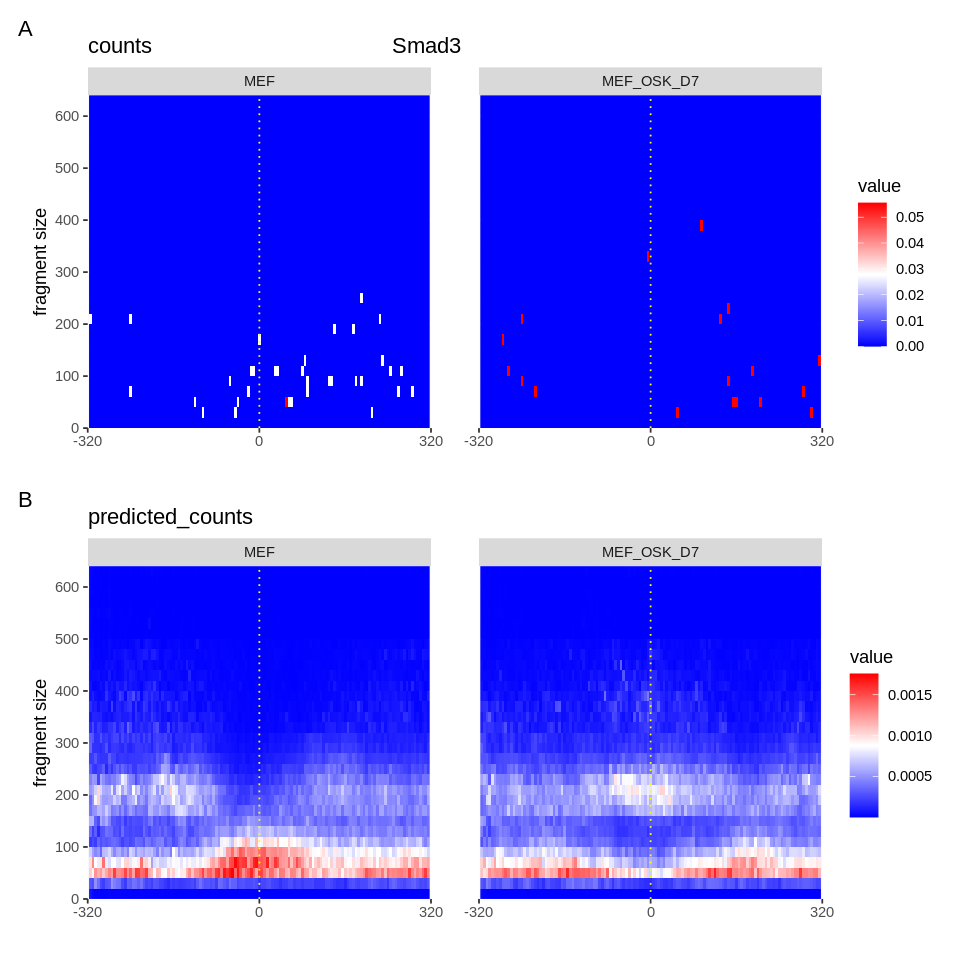

In [106]:
options(repr.plot.width = 8, repr.plot.height = 8)
p1 / p2  + plot_annotation(tag_levels = 'A')

##Maf 

In [119]:
anno_res[!is.na(anno_res$SYMBOL) & 
  anno_res$SYMBOL == 'Maf' &
  anno_res$padj < 0.05 &
  anno_res$log_ratio > 0.1]

GRanges object with 2 ranges and 17 metadata columns:
      seqnames              ranges strand |    pvalue_z        padj
         <Rle>           <IRanges>  <Rle> |   <numeric>   <numeric>
  [1]     chr8 115706681-115707320      * | 4.98668e-12 1.34673e-06
  [2]     chr8 116078807-116079446      * | 0.00000e+00 0.00000e+00
      nucleosome_treatment nucleosome_control log_ratio        annotation
                 <numeric>          <numeric> <numeric>       <character>
  [1]             0.604194           0.484378  0.221030  Promoter (<=1kb)
  [2]             0.505748           0.236393  0.760544 Distal Intergenic
        geneChr geneStart   geneEnd geneLength geneStrand      geneId
      <integer> <integer> <integer>  <integer>  <integer> <character>
  [1]         8 115701435 115707794       6360          2       17132
  [2]         8 115701435 115707794       6360          2       17132
              transcriptId distanceToTSS            ENSEMBL      SYMBOL
               <character>

In [120]:
maf <- !is.na(anno_res$SYMBOL) & 
  anno_res$SYMBOL == 'Maf' &
  anno_res$padj < 0.05 &
  anno_res$log_ratio > 0.1 &
  anno_res$annotation == 'Promoter (<=1kb)'

In [ ]:
x2 <- model %>% predict(x[maf], batch_size = ARGS[['vae_batch_size']], vplots = TRUE)
p1 <- vplot(x2, 'counts', ncol = 2L) +ggtitle('counts                                        Maf') 
p2 <- vplot(x2, 'predicted_counts', ncol = 2L)

Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”


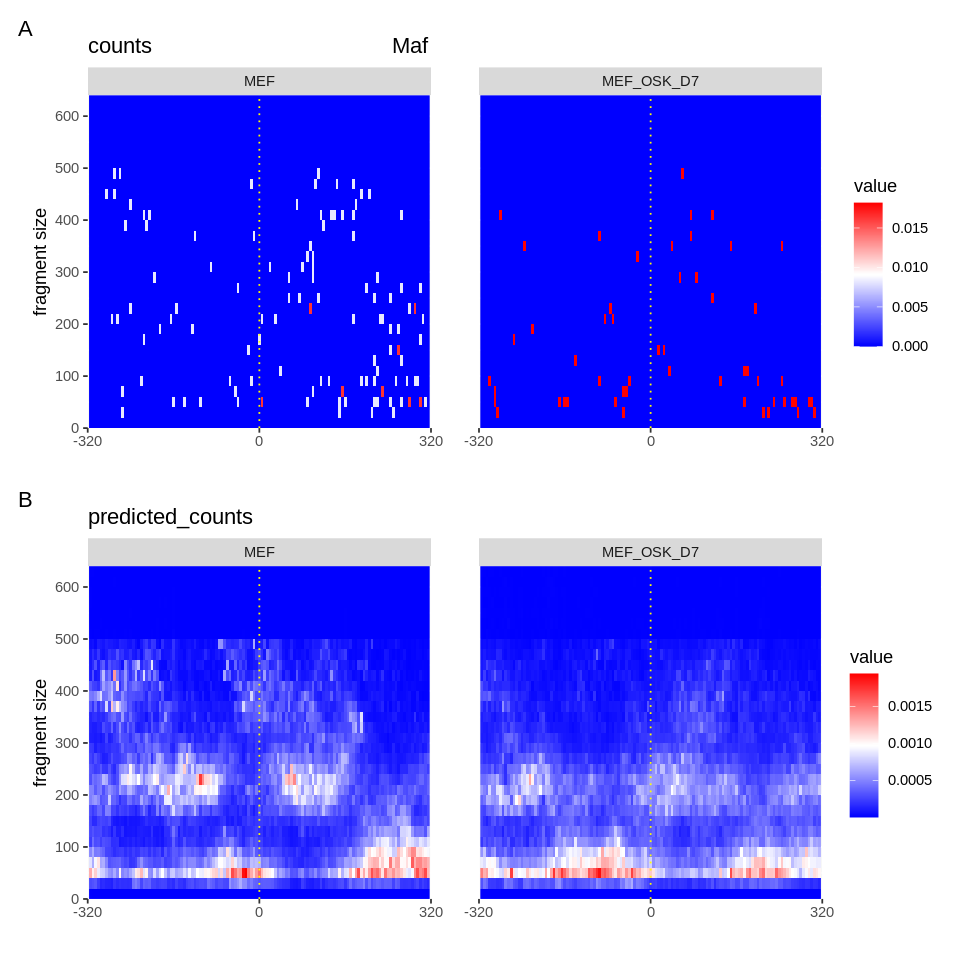

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)
p1 / p2  + plot_annotation(tag_levels = 'A')

## SessionInfo

In [111]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] clusterProfiler_4.2.2                    
 [2] org.Mm.eg.db_3.14.0                      
 [3] TxDb.Mmusculus.UCSC.mm10.knownGene_3.10.0
 [4] GenomicFeatures_1.46.5                   
 [5] AnnotationDbi_1.56.2                     
 [6] ChIPse

In [112]:
Sys.time() - start_time

Time difference of 1.927175 hours